In [ ]:
# 1. Perform correlation analysis on PM2.5 data obtained from the provinces of Kanchanaburi, Rayong and Narathiwat. Display the correlation matrix using plasma colormap.
# 2. Perform year-wise trend of line plot for all the data
# 3. Display a pie chart with explosion on any of the data with 0-50 as normal 50-100 moderate and 100+ for abnormal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Ka = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv')
Ra = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv')
Na = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv')

In [3]:
Ka

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [4]:
Ra.tail()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
23807,2019,2,7,5,18.0,40,0
23808,2019,2,7,6,27.0,42,0
23809,2019,2,7,7,20.0,37,0
23810,2019,2,7,8,29.0,34,0
23811,2019,2,7,9,22.0,35,0


In [5]:
Na.tail()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0
23814,2019,2,7,9,17.0,34,0


In [6]:
print(Ka.isnull().sum())
print(Ra.isnull().sum())
print(Na.isnull().sum())

Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64
Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64
Year             0
Month            0
Day              0
UTC Hour         0
PM2.5            0
PM10_mask        0
Retrospective    0
dtype: int64


In [7]:
print(Ka.duplicated().sum())
print(Ra.duplicated().sum())
print(Na.duplicated().sum())

11
5
7


In [8]:
Ka = Ka.drop_duplicates()
Ra = Ra.drop_duplicates()
Na = Na.drop_duplicates()

In [9]:
df1 = pd.concat([Ka['PM2.5'], Ra['PM2.5'], Na['PM2.5']], axis='columns')
df1.columns = ['Kanchanaburi', 'Rayong', 'Narathiwat']
df1

,Kanchanaburi,Rayong,Narathiwat
0,65.2,40.6,62.9
1,65.2,40.6,62.9
2,64.9,40.6,55.5
3,64.9,40.6,55.5
4,38.4,38.7,47.9
...,...,...,...
23810,NaN,29.0,15.0
23811,NaN,22.0,12.0
23812,NaN,NaN,12.0
23813,NaN,NaN,20.0


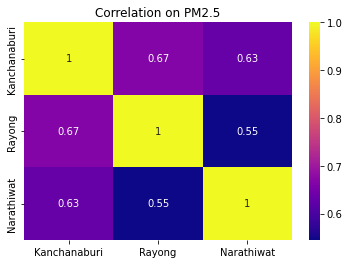

In [10]:
sns.heatmap(df1.corr(), annot=True, cmap='plasma')
plt.title('Correlation on PM2.5')
plt.show()

In [11]:
Ka_year = pd.pivot_table(Ka, values='PM2.5', index=['Year'], columns=[], aggfunc=np.mean)
Ka_year

,PM2.5
Year,
2016,20.678986
2017,23.628897
2018,24.267448
2019,58.415367


In [12]:
Ra_year = pd.pivot_table(Ra, values='PM2.5', index=['Year'], columns=[], aggfunc=np.mean)
Na_year = pd.pivot_table(Na, values='PM2.5', index=['Year'], columns=[], aggfunc=np.mean)

df2 = pd.concat([Ka_year, Ra_year, Na_year], axis='columns')
df2.columns = ['Kanchanaburi', 'Rayong', 'Narathiwat']
df2

,Kanchanaburi,Rayong,Narathiwat
Year,,,
2016,20.678986,20.485805,24.424345
2017,23.628897,19.889820,25.098466
2018,24.267448,17.738783,25.067234
2019,58.415367,39.640312,17.290646


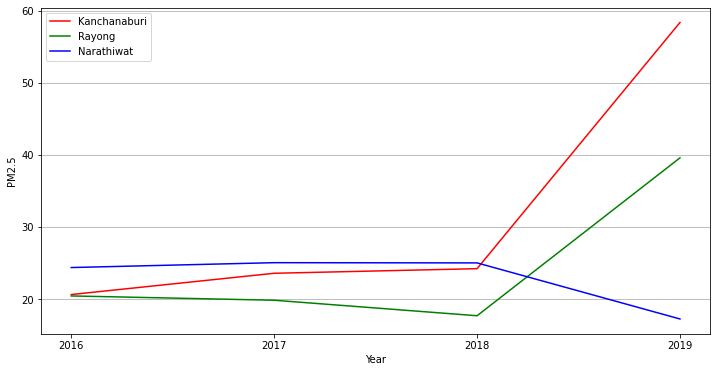

In [13]:
plt.figure(figsize=(12,6)) 
plt.plot(df2.index, df2['Kanchanaburi'], color='r', label='Kanchanaburi')
plt.plot(df2.index, df2['Rayong'], color='g', label='Rayong')
plt.plot(df2.index, df2['Narathiwat'], color='b', label='Narathiwat')
plt.xlabel('Year')
plt.ylabel('PM2.5')
plt.legend()
plt.xticks(df2.index.astype(int))
plt.grid(axis='y')
plt.show()

In [14]:
def give_rank(df):
    level = []
    for row in df['PM2.5']:
        if row <= 50:
            level.append('normal')
        elif row <= 100:
            level.append('high')
        else:
            level.append('very high')
    df['level'] = level
    return df

In [15]:
Ka = give_rank(Ka)
Ka

<ipython-input-14-f9b48cf53030>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level'] = level


,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective,level
0,2016,3,3,8,65.2,1,0,high
1,2016,3,3,9,65.2,1,0,high
2,2016,3,3,10,64.9,1,0,high
3,2016,3,3,11,64.9,1,0,high
4,2016,3,3,12,38.4,1,0,normal
...,...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0,normal
23804,2019,2,7,6,35.0,45,0,normal
23805,2019,2,7,7,42.0,56,0,normal
23806,2019,2,7,8,47.0,64,0,normal


In [16]:
Ra = give_rank(Ra)
Na = give_rank(Na)

df3 = pd.concat([Ka['level'], Ra['level'], Na['level']], axis='columns')
df3.columns = ['Kanchanaburi', 'Rayong', 'Narathiwat']
df3

,Kanchanaburi,Rayong,Narathiwat
0,high,normal,high
1,high,normal,high
2,high,normal,high
3,high,normal,high
4,normal,normal,normal
...,...,...,...
23810,NaN,normal,normal
23811,NaN,normal,normal
23812,NaN,NaN,normal
23813,NaN,NaN,normal


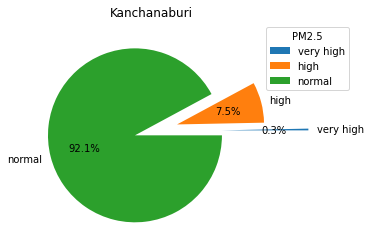

In [17]:
Ka_fraction = []
Ka_fraction.append(df3[df3['Kanchanaburi']=='very high']['Kanchanaburi'].count())
Ka_fraction.append(df3[df3['Kanchanaburi']=='high']['Kanchanaburi'].count())
Ka_fraction.append(df3[df3['Kanchanaburi']=='normal']['Kanchanaburi'].count())

labels = ["very high", "high", "normal"]
explode = [0.8, 0.3, 0.2]
position = [1, 0, 0.3, 1]

plt.pie(Ka_fraction, labels=labels, explode=explode, autopct="%1.1f%%")
plt.legend(title="PM2.5", bbox_to_anchor=position)
plt.title('Kanchanaburi')

plt.show()

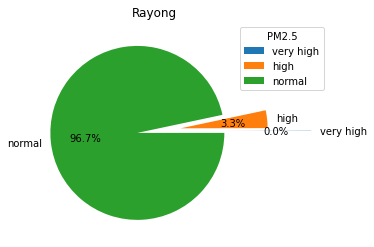

In [18]:
Ra_fraction = []
Ra_fraction.append(df3[df3['Rayong']=='very high']['Rayong'].count())
Ra_fraction.append(df3[df3['Rayong']=='high']['Rayong'].count())
Ra_fraction.append(df3[df3['Rayong']=='normal']['Rayong'].count())

plt.pie(Ra_fraction, labels=labels, explode=explode, autopct="%1.1f%%")
plt.legend(title="PM2.5", bbox_to_anchor=position)
plt.title('Rayong')

plt.show()

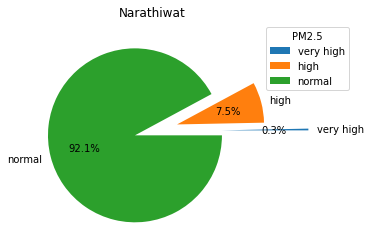

In [20]:
Na_fraction = []
Na_fraction.append(df3[df3['Narathiwat']=='very high']['Narathiwat'].count())
Na_fraction.append(df3[df3['Narathiwat']=='high']['Narathiwat'].count())
Na_fraction.append(df3[df3['Narathiwat']=='normal']['Narathiwat'].count())

plt.pie(Ka_fraction, labels=labels, explode=explode, autopct="%1.1f%%")
plt.legend(title="PM2.5", bbox_to_anchor=position)
plt.title('Narathiwat')

plt.show()